# Predicting gender with Random Forest

In [109]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
pwd

'/Users/orsi/Dropbox/behance-data'

In [10]:
import pandas as pd
data_in="/Users/orsi/Dropbox/behance-data/"
data=pd.read_csv(data_in+"behance_filtered_sample_min10_act_max5000_following_sample0.csv").set_index('user_id')

In [14]:
data=data.join(pd.get_dummies(data['gender'], prefix='gender'))

In [15]:
data.columns

Index(['fields', 'followers', 'following', 'username', 'gender', 'country',
       'comments', 'project_counts', 'project_views', 'project_appreciations',
       'project_comments', 'created_on', 'created2', 'tenure', 'appreciate',
       'total_activity', 'graphic_design', 'illustration', 'branding',
       'art_direction', 'digital_art', 'photography', 'advertising', 'drawing',
       'typography', 'print_design', 'web_design', 'character_design',
       'editorial_design', 'fashion', 'packaging', 'fine_arts',
       'digital_photography', 'painting', 'creative_direction', 'animation',
       'ui_ux', 'product_design', 'architecture', 'motion_graphics',
       'cartooning', 'interaction_design', 'retouching', 'icon_design',
       'industrial_design', 'interior_design', 'music', 'film', 'calligraphy',
       'design', 'crafts', 'visual_effects', 'game_design',
       'exhibition_design', 'pattern_design', 'sculpting', 'furniture_design',
       'copywriting', 'computer_animation', 'w

In [16]:
target='gender_female'
cs=['total_activity', 'project_counts','comments', "following", 'Photography', 'Graphic_Design', 'Branding',
       'Art_Direction', 'Digital_Art', 'Fashion_Photography', 'Fine_Arts',
       'Web_design_UX', 'Advertising' ]

In [19]:
data_to_predict=data.replace(np.nan,0)

In [65]:
from sklearn.preprocessing import StandardScaler

y = data_to_predict[target]
churn_feat_space = data_to_predict[cs]
features = churn_feat_space.columns
X = churn_feat_space.as_matrix().astype(np.float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [64]:
data_to_predict[target].value_counts()

1    6000
0    6000
Name: gender_female, dtype: int64

In [48]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=66)

In [22]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier(
    n_estimators=1000,
    criterion='gini',
    max_depth=10,
    min_samples_split=100,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    random_state=1,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [23]:
# Evaluating Performance

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc', n_jobs=-1)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1827 1176]
 [1018 1979]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.64      0.61      0.62      3003
          1       0.63      0.66      0.64      2997

avg / total       0.63      0.63      0.63      6000



=== All AUC Scores ===
[0.69389444 0.67029722 0.69674722 0.67574028 0.67220278 0.68863333
 0.67955278 0.70315833 0.69754722 0.69921667]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6876990277777778


In [24]:
# Hyperparameter Optimization

from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, max_features=auto, max_depth=140 .............
[CV] n_estimators=1000, max_features=auto, max_depth=140 .............
[CV] n_estimators=1000, max_features=auto, max_depth=140 .............
[CV] n_estimators=1400, max_features=auto, max_depth=100 .............
[CV]  n_estimators=1000, max_features=auto, max_depth=140, total=  12.6s
[CV] n_estimators=1400, max_features=auto, max_depth=100 .............
[CV]  n_estimators=1000, max_features=auto, max_depth=140, total=  12.8s
[CV] n_estimators=1400, max_features=auto, max_depth=100 .............
[CV]  n_estimators=1000, max_features=auto, max_depth=140, total=  13.4s
[CV] n_estimators=800, max_features=sqrt, max_depth=260 ..............
[CV]  n_estimators=1400, max_features=auto, max_depth=100, total=  17.8s
[CV] n_estimators=800, max_features=sqrt, max_depth=260 ..............
[CV]  n_estimators=800, max_features=sqrt, max_depth=260, total=   9.0s
[CV] 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min


[CV]  n_estimators=1400, max_features=auto, max_depth=500, total=  18.0s
[CV] n_estimators=1000, max_features=sqrt, max_depth=300 .............
[CV]  n_estimators=1000, max_features=sqrt, max_depth=300, total=  13.9s
[CV] n_estimators=1000, max_features=sqrt, max_depth=300 .............
[CV]  n_estimators=1400, max_features=auto, max_depth=500, total=  18.7s
[CV] n_estimators=1800, max_features=auto, max_depth=420 .............
[CV]  n_estimators=1400, max_features=auto, max_depth=500, total=  19.4s
[CV] n_estimators=1800, max_features=auto, max_depth=420 .............
[CV]  n_estimators=1000, max_features=sqrt, max_depth=300, total=  15.8s
[CV] n_estimators=1800, max_features=auto, max_depth=420 .............
[CV]  n_estimators=1000, max_features=sqrt, max_depth=300, total=  12.1s
[CV] n_estimators=800, max_features=sqrt, max_depth=300 ..............
[CV]  n_estimators=800, max_features=sqrt, max_depth=300, total=  14.1s
[CV] n_estimators=800, max_features=sqrt, max_depth=300 ........

[CV]  n_estimators=1400, max_features=sqrt, max_depth=260, total=  15.4s
[CV] n_estimators=1800, max_features=auto, max_depth=None ............
[CV]  n_estimators=1400, max_features=sqrt, max_depth=260, total=  15.7s
[CV] n_estimators=1800, max_features=auto, max_depth=None ............
[CV]  n_estimators=1400, max_features=sqrt, max_depth=260, total=  16.3s
[CV] n_estimators=1200, max_features=auto, max_depth=140 .............
[CV]  n_estimators=1800, max_features=auto, max_depth=None, total=  23.3s
[CV] n_estimators=1200, max_features=auto, max_depth=140 .............
[CV]  n_estimators=1200, max_features=auto, max_depth=140, total=  14.7s
[CV] n_estimators=1200, max_features=auto, max_depth=140 .............
[CV]  n_estimators=1800, max_features=auto, max_depth=None, total=  21.1s
[CV] n_estimators=600, max_features=auto, max_depth=460 ..............
[CV]  n_estimators=1800, max_features=auto, max_depth=None, total=  21.7s
[CV] n_estimators=600, max_features=auto, max_depth=460 ....

[CV]  n_estimators=2000, max_features=sqrt, max_depth=340, total=  27.4s
[CV] n_estimators=1000, max_features=auto, max_depth=500 .............
[CV]  n_estimators=2000, max_features=sqrt, max_depth=340, total=  26.3s
[CV] n_estimators=1000, max_features=auto, max_depth=500 .............
[CV]  n_estimators=1000, max_features=auto, max_depth=500, total=  14.8s
[CV] n_estimators=1400, max_features=auto, max_depth=460 .............
[CV]  n_estimators=1000, max_features=auto, max_depth=500, total=  14.9s
[CV] n_estimators=1400, max_features=auto, max_depth=460 .............
[CV]  n_estimators=2000, max_features=sqrt, max_depth=340, total=  26.9s
[CV] n_estimators=1400, max_features=auto, max_depth=460 .............
[CV]  n_estimators=1000, max_features=auto, max_depth=500, total=   8.8s
[CV] n_estimators=1600, max_features=auto, max_depth=500 .............
[CV]  n_estimators=1400, max_features=auto, max_depth=460, total=  14.2s
[CV] n_estimators=1600, max_features=auto, max_depth=500 ......

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.1min


[CV]  n_estimators=1400, max_features=auto, max_depth=460, total=  16.0s
[CV] n_estimators=1600, max_features=auto, max_depth=500 .............
[CV]  n_estimators=1400, max_features=auto, max_depth=460, total=  16.9s
[CV] n_estimators=800, max_features=sqrt, max_depth=460 ..............
[CV]  n_estimators=1600, max_features=auto, max_depth=500, total=  20.3s
[CV] n_estimators=800, max_features=sqrt, max_depth=460 ..............
[CV]  n_estimators=800, max_features=sqrt, max_depth=460, total=  10.3s
[CV] n_estimators=800, max_features=sqrt, max_depth=460 ..............
[CV]  n_estimators=1600, max_features=auto, max_depth=500, total=  18.8s
[CV] n_estimators=1000, max_features=auto, max_depth=None ............
[CV]  n_estimators=1600, max_features=auto, max_depth=500, total=  20.9s
[CV] n_estimators=1000, max_features=auto, max_depth=None ............
[CV]  n_estimators=800, max_features=sqrt, max_depth=460, total=  10.0s
[CV] n_estimators=1000, max_features=auto, max_depth=None .......

[CV]  n_estimators=400, max_features=sqrt, max_depth=300, total=   6.3s
[CV] n_estimators=400, max_features=sqrt, max_depth=300 ..............
[CV]  n_estimators=1600, max_features=sqrt, max_depth=420, total=  19.3s
[CV] n_estimators=2000, max_features=auto, max_depth=140 .............
[CV]  n_estimators=1600, max_features=sqrt, max_depth=420, total=  19.7s
[CV] n_estimators=2000, max_features=auto, max_depth=140 .............
[CV]  n_estimators=400, max_features=sqrt, max_depth=300, total=   4.1s
[CV] n_estimators=2000, max_features=auto, max_depth=140 .............
[CV]  n_estimators=1600, max_features=sqrt, max_depth=420, total=  20.4s
[CV] n_estimators=1000, max_features=auto, max_depth=340 .............
[CV]  n_estimators=1000, max_features=auto, max_depth=340, total=  14.6s
[CV] n_estimators=1000, max_features=auto, max_depth=340 .............
[CV]  n_estimators=2000, max_features=auto, max_depth=140, total=  23.9s
[CV] n_estimators=1000, max_features=auto, max_depth=340 ........

[CV] n_estimators=800, max_features=auto, max_depth=None .............
[CV]  n_estimators=1800, max_features=auto, max_depth=140, total=  24.8s
[CV] n_estimators=1800, max_features=auto, max_depth=380 .............
[CV]  n_estimators=800, max_features=auto, max_depth=None, total=  11.1s
[CV] n_estimators=1800, max_features=auto, max_depth=380 .............
[CV]  n_estimators=800, max_features=auto, max_depth=None, total=   9.4s
[CV] n_estimators=1800, max_features=auto, max_depth=380 .............
[CV]  n_estimators=800, max_features=auto, max_depth=None, total=   9.5s
[CV] n_estimators=400, max_features=auto, max_depth=420 ..............
[CV]  n_estimators=400, max_features=auto, max_depth=420, total=   4.5s
[CV] n_estimators=400, max_features=auto, max_depth=420 ..............
[CV]  n_estimators=400, max_features=auto, max_depth=420, total=   6.5s
[CV] n_estimators=400, max_features=auto, max_depth=420 ..............
[CV]  n_estimators=1800, max_features=auto, max_depth=380, total=  

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.3min finished


{'n_estimators': 1400, 'max_features': 'auto', 'max_depth': 100}


### BEST FEATURES: {'n_estimators': 1400, 'max_features': 'auto', 'max_depth': 100}

In [25]:
rfc2 = RandomForestClassifier(
    n_estimators=1400,
    criterion='gini',
    max_depth=100,
    min_samples_split=100,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    random_state=1,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)
rfc2.fit(X_train,y_train)
# predictions
rfc_predict = rfc2.predict(X_test)

In [144]:
#len(rfc_predict)

In [26]:
rfc_predict = rfc2.predict(X_test)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc2, X, y, cv=10, scoring='roc_auc', n_jobs=-1)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1851 1152]
 [1046 1951]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.64      0.62      0.63      3003
          1       0.63      0.65      0.64      2997

avg / total       0.63      0.63      0.63      6000



=== All AUC Scores ===
[0.69721389 0.67062778 0.69619167 0.67878889 0.67185833 0.686725
 0.68041944 0.70328333 0.69780556 0.69972222]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6882636111111111


In [28]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, rfc_predict)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.58


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'2-class Precision-Recall curve: AP=0.58')

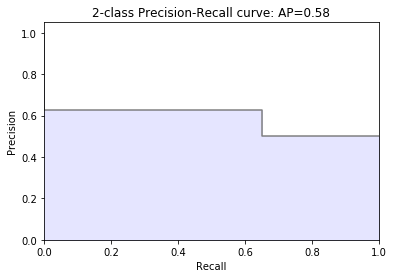

In [30]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, rfc_predict)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='grey',
         where='post')
plt.fill_between(recall, precision, alpha=0.1, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [31]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [32]:
y_scores=rfc_predict

In [33]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    #plt.hlines(0.5, 0, 1, 'red')
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [35]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [36]:
# recall : how many relevant items are selected?
# precision: How many selected items are relevant?

In [37]:
#https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png

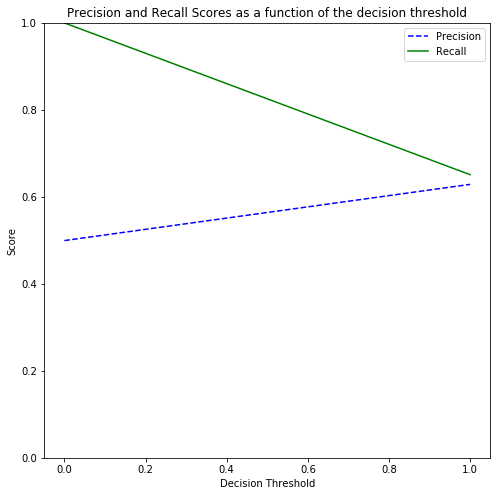

In [38]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [39]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [45]:
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

In [101]:
#data_to_predict_shuffled=data_to_predict.sample(frac=1)
from sklearn.preprocessing import StandardScaler

y = data_to_predict[target].as_matrix().astype(np.float)
churn_feat_space = data_to_predict[cs]

features = churn_feat_space.columns
X = churn_feat_space.as_matrix().astype(np.float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


TRAIN: [  600   601   602 ... 11997 11998 11999] TEST: [   0    1    2 ... 6597 6598 6599]
TRAIN: [    0     1     2 ... 11997 11998 11999] TEST: [ 600  601  602 ... 7197 7198 7199]
TRAIN: [    0     1     2 ... 11997 11998 11999] TEST: [1200 1201 1202 ... 7797 7798 7799]
TRAIN: [    0     1     2 ... 11997 11998 11999] TEST: [1800 1801 1802 ... 8397 8398 8399]
TRAIN: [    0     1     2 ... 11997 11998 11999] TEST: [2400 2401 2402 ... 8997 8998 8999]
TRAIN: [    0     1     2 ... 11997 11998 11999] TEST: [3000 3001 3002 ... 9597 9598 9599]
TRAIN: [    0     1     2 ... 11997 11998 11999] TEST: [ 3600  3601  3602 ... 10197 10198 10199]
TRAIN: [    0     1     2 ... 11997 11998 11999] TEST: [ 4200  4201  4202 ... 10797 10798 10799]
TRAIN: [    0     1     2 ... 11997 11998 11999] TEST: [ 4800  4801  4802 ... 11397 11398 11399]
TRAIN: [    0     1     2 ... 11397 11398 11399] TEST: [ 5400  5401  5402 ... 11997 11998 11999]


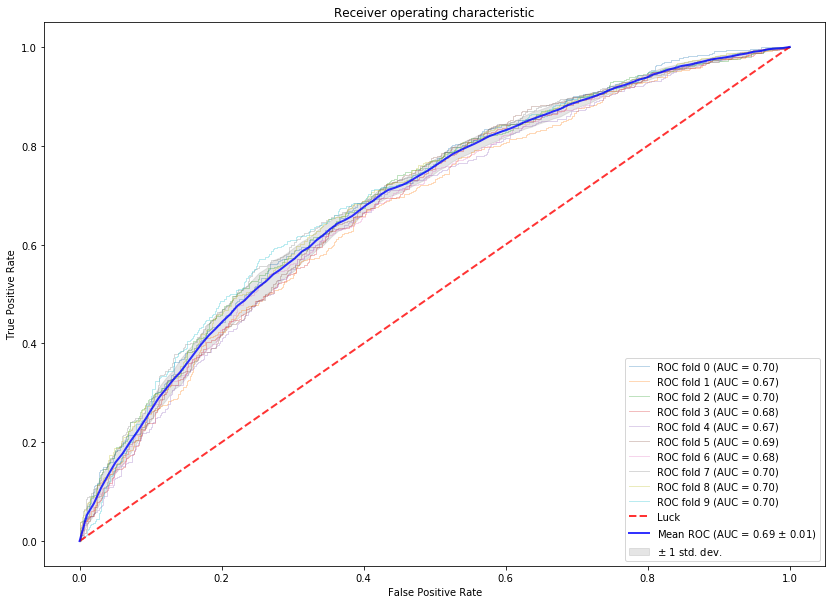

,AUC Train,AUC Test
0,0.803761,0.697214
1,0.805195,0.670628
2,0.805110,0.696192
3,0.803838,0.678789
4,0.804437,0.671858
5,0.804708,0.686725
6,0.806288,0.680419
7,0.803613,0.703283
8,0.804453,0.697806
9,0.804613,0.699722


In [102]:
clf=rfc2
skf = StratifiedKFold(n_splits=10)
for train, test in skf.split(X, y):
    print("TRAIN:", train, "TEST:", test)
    X_train, X_test = X[train], X[test] 
    y_train, y_test = y[train], y[test]
    rfc2.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    

In [103]:
from collections import defaultdict
import seaborn as sns
def importance_plot(clf):
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    importance_d=defaultdict(int)
    for f in range(0,len(cs)):
        #print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]), cs[indices[f]])
        importance_d[cs[indices[f]]]=importances[indices[f]]
    D=pd.DataFrame.from_dict(importance_d, "index")
    D=D.rename(columns={0:"importance"})
    ax=D.sort_values("importance", ascending=False)[:25].plot(kind="bar", 
                            figsize=(10,7), title="Importance of Variables in Predicting Gender on Gitub (N=20 000)")
    plt.tight_layout()
    fig = ax.get_figure()
    #fig.savefig(pathdataout+"importance_PC_SAMPLE"+str(k)+'.pdf')
    sns.despine()
    fig.show() 
    plt.show()
    plt.close(fig)
    return D

/Users/orsi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


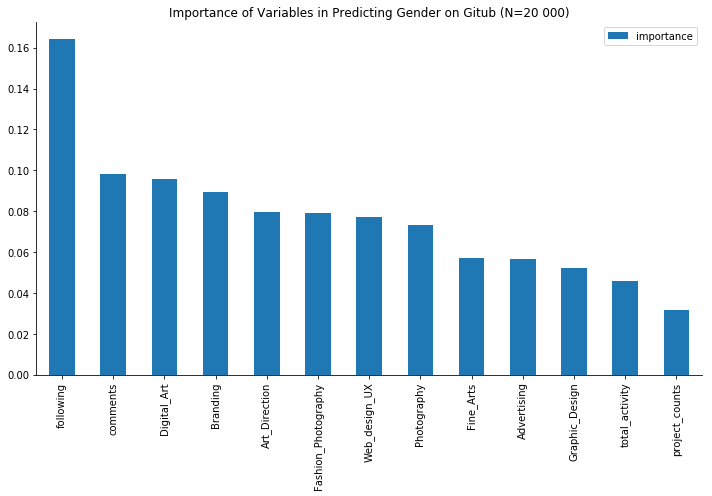

,importance
following,0.164140
comments,0.097937
Digital_Art,0.095924
Branding,0.089360
Art_Direction,0.079772
Fashion_Photography,0.079084
Web_design_UX,0.077362
Photography,0.073295
Fine_Arts,0.057215
Advertising,0.056820


In [104]:
importance_plot(rfc2)

In [105]:
len(data_to_predict)

12000

In [106]:
data_to_predict_shuffled=data_to_predict.sample(frac=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=66)

In [107]:

from sklearn.preprocessing import StandardScaler

y = data_to_predict_shuffled[target]
churn_feat_space = data_to_predict_shuffled[cs]
features = churn_feat_space.columns
X = churn_feat_space.as_matrix().astype(np.float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [273]:
#y_test.index

In [110]:
#Final model for regressor

from sklearn.preprocessing import StandardScaler

y = data_to_predict_shuffled[target]
churn_feat_space = data_to_predict_shuffled[cs]
features = churn_feat_space.columns
X = churn_feat_space.as_matrix().astype(np.float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

rfc4 = RandomForestRegressor(
    n_estimators=1400,
    max_depth=100,
    max_features='auto',
    random_state=1,
    n_jobs=-1,
    min_samples_leaf=10,
    warm_start= False
)
rfc4.fit(X_train,y_train)
# predictions
rfc_predict = rfc4.predict(X_test)

y_pred=y.copy()
y_pred[y.index] = rfc4.predict(X)
data_to_predict['femaleness_2_new']=y_pred

/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


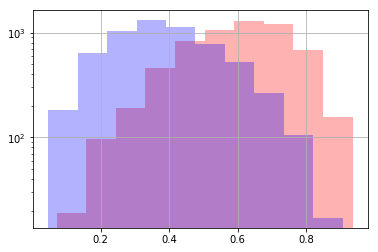

In [111]:
ax=data_to_predict[data_to_predict['gender']=='female']['femaleness_2_new'].hist(log=True, color="red", alpha=0.3)
data_to_predict[data_to_predict['gender']=='male']['femaleness_2_new'].hist(ax=ax, log=True, color="blue", alpha=0.3)

In [113]:
data_to_predict.to_csv('behance_sample1_with_femaleness.csv')

In [115]:
data_to_predict[data_to_predict['gender']=='female']['femaleness_2_new'].describe()

count    6000.000000
mean        0.598007
std         0.151688
min         0.071127
25%         0.495467
50%         0.611726
75%         0.713898
max         0.935816
Name: femaleness_2_new, dtype: float64

In [116]:
data_to_predict[data_to_predict['gender']=='male']['femaleness_2_new'].describe()

count    6000.000000
mean        0.393310
std         0.155680
min         0.046444
25%         0.279893
50%         0.380639
75%         0.496087
max         0.907388
Name: femaleness_2_new, dtype: float64